# Installation and import

In [1]:
# !pip install langid
# !pip install emoji

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 21.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for langid: filename=langid-1.1.6-py3-none-any.whl size=1941172 sha256=ebce80b372ae53e9d82c9b67992fd84ca3d66f18655a64167aa5dfc395d64c55
  Stored in directory: /root/.cache/pip/wheels/23/c8/c6/eed80894918490a175677414d40bd7c851413bbe03d4856c3c
Successfully built langid
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 358.9/358.9 kB 4.8 MB/s eta 0:00:00


In [ ]:
# !pip install keras
# !pip install --upgrade tensorflow
# !pip install --upgrade tensorflow-gpu

In [2]:
import pandas as pd
import langid
import emoji
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from google.colab import autoviz
from collections import Counter
from sklearn import metrics
import tensorflow as tf
from tensorflow import keras


from keras.layers import MaxPool1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras.callbacks import EarlyStopping, LearningRateScheduler
from tensorflow.keras.optimizers import SGD,Adam
from tensorflow.keras import regularizers

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical


import re
import pandas as pd
import langid
import emoji
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
from google.colab import autoviz
from collections import Counter
import re
import csv
import string
import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
import csv
import string
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

# Dataset load

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
train_df = pd.read_csv("/content/drive/MyDrive/ML /train.csv")
test_df = pd.read_csv("/content/drive/MyDrive/ML /test.csv")

# Analysis of Dataset

In [5]:
train_df.head(10)

,summary,genre,Label
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3
5,#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা।\r\n বইয়ের না...,Fiction,0
6,#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা বইঃ বোতল ভূত ...,Childrens-Book,2
7,পাঠকনন্দিত লেখক ডক্টর মুহম্মদ জাফর ইকবাল স্যার...,Thriller,1
8,বই : নাথিং লাস্টস ফরএভার \r\nলেখক : সিডনি শেলড...,Thriller,1
9,একসময় দিনরাত গল্পের বইয়ে মুখ গুঁজে পড়ে থাকতাম।...,Fiction,0


In [6]:
test_df.head()

,Id,summary
0,0,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...
1,1,বইঃ দ্য সান অফ লাইট (রামেসিস #1) লেখকঃ ক্রিশ্চ...
2,2,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...
3,3,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...
4,4,অনেক সুন্দর এবং অসাধারণ একটি বই.... মধ্যবিত্ত...


In [7]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3887 entries, 0 to 3886
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   summary  3886 non-null   object
 1   genre    3887 non-null   object
 2   Label    3887 non-null   int64 
dtypes: int64(1), object(2)
memory usage: 91.2+ KB


In [8]:
train_df.shape

(3887, 3)

In [9]:
uni=train_df.genre.unique()
print(f"Categories of Trainset: {uni} and Count: {len(uni)}")

Categories of Trainset: ['Childrens-Book' 'Fiction' 'Political' 'Thriller' 'Science-Fiction'
 'Motivational' 'War'] and Count: 7


# Null Value

In [10]:
train_df.isna().sum()

summary    1
genre      0
Label      0
dtype: int64

In [11]:
train_df.dropna(inplace=True)

# Drop Summary length below 5

In [12]:
train_df['count'] = train_df['summary'].str.split().str.len()
train_df= train_df.loc[train_df['count']>5]

In [13]:
train_df.shape

(3760, 4)

In [14]:
train_df.head()

,summary,genre,Label,count
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2,676
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0,67
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0,214
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0,380
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3,13


# Dataset pre-processing

In [15]:

df = pd.DataFrame(train_df['summary'])

def is_english(text):
    language, confidence = langid.classify(text)
    return language == 'en'

df['is_english'] = df['summary'].apply(is_english)

english_count = df['is_english'].sum()
english_indices = df.loc[df['is_english']].summary

print(f"Row indices with fully English text: \n{english_indices}")

Row indices with fully English text: 
36      Average quality story if compare with other fe...
38            When this book will available in your stock
41      this book is anisul haque's first novel and in...
98      This book is a rare piece of property for Bang...
124     It’sa great book. Very informative.  I'm total...
                              ...                        
3671    Not as a my friend of the writer, I would say ...
3780    Almost all the stories written by Dr. Jafor Si...
3784    It is a Great Book of that time Political Parties
3817              A brief journey into Pakistan period...
3863    Himu... himu... himu\r\nWhat can I really say ...
Name: summary, Length: 98, dtype: object


In [16]:
print(f"Number of cells with fully English text: {english_count}")

Number of cells with fully English text: 98


In [17]:
train_df['is_english'] = df['is_english']

In [18]:
train_df.head(5)

,summary,genre,Label,count,is_english
0,#BookReview\r\n\r\nবইঃ চাঁদের পাহাড়\r\nধরনঃ অ...,Childrens-Book,2,676,False
1,বেশির ভাগ বই ই আমার ভাললাগে। কিন্তু এই টাইপের ...,Fiction,0,67,False
2,মিসির আলি এখন তার ছাত্র ফারুকের শ্বশুর বাড়ি কই...,Fiction,0,214,False
3,ছোটজাতের ছোটজাত হাসিম। পিতৃপ্রদত্ত নামখানা একর...,Fiction,0,380,False
4,ফালতু একটা বই। পয়সা নষ্ট। বাজে লেখনী। একই জিনি...,Political,3,13,False


# Remove Punctuation



1.   Preprocess only in Bangla (Need to discuss what should we do for english)
2.   Did not remove many unnecessary words like (prishta number, mullo, lekhok, taka)



In [19]:
def remove_punctuations(text, is_english):
    if not is_english:
        emoji_pattern = re.compile("["
                                   u"\U0001F600-\U0001F64F"  # emoticons
                                   u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                                   u"\U0001F680-\U0001F6FF"  # transport & map symbols
                                   u"\U0001F700-\U0001F77F"  # alchemical symbols
                                   u"\U0001F780-\U0001F7FF"  # Geometric Shapes Extended
                                   u"\U0001F800-\U0001F8FF"  # Supplemental Arrows-C
                                   u"\U0001F900-\U0001F9FF"  # Supplemental Symbols and Pictographs
                                   u"\U0001FA00-\U0001FA6F"  # Chess Symbols
                                   u"\U0001FA70-\U0001FAFF"  # Symbols and Pictographs Extended-A
                                   u"\U00002702-\U000027B0"  # Dingbats
                                   u"\U000024C2-\U0001F251"
                                   "]+", flags=re.UNICODE)
        text = emoji_pattern.sub(r'', text)

        whitespace = re.compile(u"[\s\u0020\u00a0\u1680\u180e\u202f\u205f\u3000\u2000-\u200a]+", re.UNICODE)
        bangla_fullstop = u"\u0964"
        punctSeq = u"['\"“”‘’]+|[.?!,…]+|[:;]+"
        punc = u"[(),$%^&*+={}\[\]:\"\৷|\'\~`<>/,¦!?½£¶¼©⅐⅑⅒⅓⅔⅕⅖⅗⅘⅙⅚⅛⅜⅝⅞⅟↉¤¿º;-]+"
        bangla_taka = u"\u09F3"
        text = re.sub(bangla_taka, " ", text)
        text = re.sub(r'(^|\s)@(\w+)', r'\1@user', text)
        text = re.sub(r'\bhttps?://\S+\b', '', text)
        bangla_numeric = u"\u09E6-\u09EF"
        text = re.sub(f"[{bangla_numeric}]+", "", text)
        text = whitespace.sub(" ", text).strip()
        text = re.sub(punctSeq, " ", text)
        text = re.sub(bangla_fullstop, " ", text)
        text = re.sub(punc, " ", text)
        text = re.sub('[!"#$%&\'()*+,-./:;<=>?@[\]^_`{|}~]', ' ', text)
        text = text.replace("\\", " ")
        text = whitespace.sub(" ", text).strip()
    else:
        text = re.sub(r'(^|\s)@(\w+)', r'\1@user', text)
        text = re.sub(r'\bhttps?://\S+\b', '', text)
        text = re.sub(r'[^a-zA-Z\s]', '', text)
        text = text.lower()

        tokens = word_tokenize(text)
        stop_words = set(stopwords.words('english'))
        tokens = [token for token in tokens if token not in stop_words]
        text = ' '.join(tokens)

    return text

train_df['summary'] = train_df.apply(lambda row: remove_punctuations(row['summary'], row['is_english']), axis=1)


In [20]:
train_df['summary'][10]

'যারা বর্তমান সাৎেযন্স ফিকশন পড়ে এবং দেখে অভ্যস্থ তাদের কাছে এইচ জি ওয়েলস এর লেখা সায়েন্স ফিকশনগুলো ঠিক সায়েন্স ফিকশন মনে হবে না টাইম মেশিন পড়বার সময় পাঠক যদি চিন্তা করেন কোন সময়ে বসে ওয়েলস এই বইটি তিনি লিখেছেন সেই সমযকার বিজ্ঞান এর অঘ্রগতি কি ছিল তা হলে হয়ত তারা এর কেবলমাত্র সায়েন্স অংশটুকুকে সমালোচনা করার বদলে একই সাথে ফিকশন অংশটিকেও উপভোগ করতে পারবেন সায়েন্স ফিকশন এর এই এক সমস্যা আজ যেটা অসাধারণ আধুনিক ধারনা কাল সকাল হতেই সেটা যে পুরনো কোন ধারনায় পরিণত হবে না এই গ্যারন্টি স্বয়ং লেখকও দিতে পারবেন না আর তাই বইটি লেখার সময়ে যে অসাধারণ সাড়া জাগিয়েছিল এখনকার পাঠকের মনে তা হয়ত তৈরি করতে পারবে না তবে গল্পটি ভাল সুতরাং পড়ে দেখলে সময় নষ্ট হবে না এছাড়া এটি একট ওয়ার্ল্ড ক্লাসিক'

# Remove Stopwords

In [21]:
not_imp_word = ['রকমারি', 'লিঙ্কঃ','রিভিউ','লেখকঃ','প্রকাশনীঃ', 'প্রচ্ছদঃ', 'পৃষ্ঠাঃ', 'মল্যঃ','রিভিউঃ','রেটিং','বইঃ','মুদ্রিত','প্রকাশনা','ধরনঃ']


In [22]:
from collections import Counter
cnt = Counter()
for text in train_df['summary'].values:
    for word in text.split():
        cnt[word] += 1
sorted_cnt = dict(sorted(cnt.items(), key=lambda item: item[1], reverse= True))
sorted_cnt = Counter(sorted_cnt)
print('Total Unique Words:', len(sorted_cnt))

Total Unique Words: 73826


In [23]:
print('Top 15 frequent words:')
for word, frequency in sorted_cnt.most_common(15):
    print(f'{word}: {frequency}')

Top 15 frequent words:
তার: 12294
এই: 12005
করে: 11833
না: 10956
আর: 8894
এক: 7751
ও: 6711
থেকে: 6557
সে: 6314
কিন্তু: 6251
হয়: 5893
এবং: 5718
যে: 5558
একটা: 5108
সাথে: 5105


In [24]:
stop_word_list = (stopwords.words('bengali'))
stop_word_list+=not_imp_word
def stopword_remover(doc):
	tokens = doc.split()
	stop_words = stop_word_list
	tokens = [w for w in tokens if not w in stop_words]
	tokens = ' '.join(tokens)
	return tokens
train_df['summary'] = train_df.summary.apply(stopword_remover)

In [25]:
from collections import Counter
cnt = Counter()
for text in train_df['summary'].values:
    for word in text.split():
        cnt[word] += 1
sorted_cnt = dict(sorted(cnt.items(), key=lambda item: item[1], reverse= True))
sorted_cnt = Counter(sorted_cnt)
print('Total Unique Words:', len(sorted_cnt))

Total Unique Words: 73432


In [26]:
print('Top 15 frequent words:')
for word, frequency in sorted_cnt.most_common(15):
    print(f'{word}: {frequency}')

Top 15 frequent words:
এক: 7751
একটা: 5108
সাথে: 5105
যায়: 4537
বই: 4366
লেখক: 4313
হয়ে: 4001
কথা: 3474
বইটি: 3353
হয়েছে: 3094
একজন: 2634
পড়ে: 2629
উপন্যাস: 2614
ভালো: 2573
গল্প: 2554


# Data Visualization

<Figure size 1600x1600 with 0 Axes>

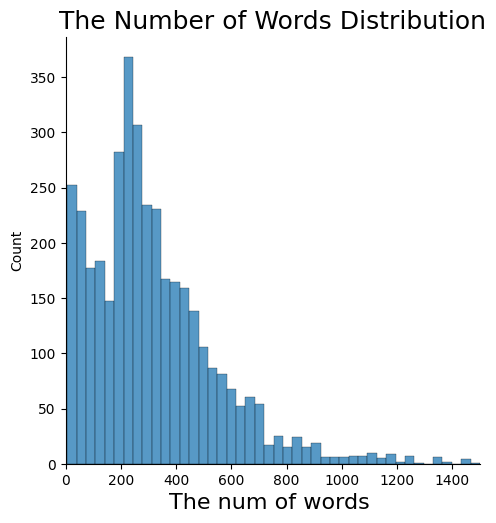

In [27]:
plt.figure(figsize= (16, 16))

sns.displot(train_df['count'])

plt.xlim(0, 1500)

plt.xlabel('The num of words ', fontsize = 16)
plt.title("The Number of Words Distribution", fontsize = 18)
plt.show()

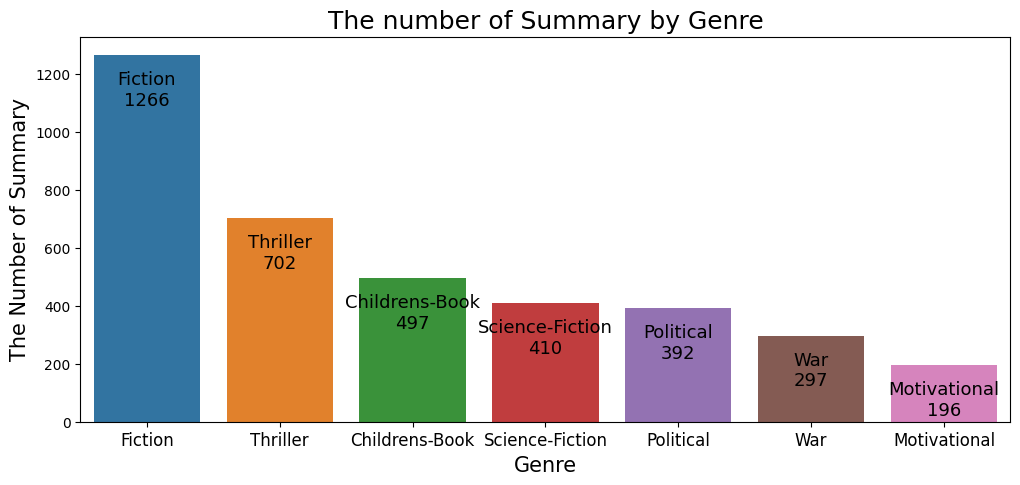

In [28]:
category_count = train_df['genre'].value_counts()

categories = category_count.index

fig = plt.figure(figsize= (12, 5))

ax = fig.add_subplot(111)

sns.barplot(x = category_count.index, y = category_count )

for a, p in enumerate(ax.patches):
    ax.annotate(f'{categories[a]}\n' + format(p.get_height(), '.0f'), xy = (p.get_x() + p.get_width() / 2.0, p.get_height()), xytext = (0,-25), size = 13, color = 'black' , ha = 'center', va = 'center', textcoords = 'offset points' )

plt.xlabel('Genre', size = 15)

plt.ylabel('The Number of Summary', size= 15)

plt.xticks(size = 12)

plt.title("The number of Summary by Genre" , size = 18)

plt.show()

# Multi Class to Binary class using One-hot Encoding

In [29]:

df = df.sample(frac=1).reset_index(drop=True)


In [30]:
df = train_df

df = df[df['is_english'] != True]
columns_to_drop = [ 'genre','is_english']
df = df.drop(columns=columns_to_drop)

In [31]:
df = df.sample(frac=1).reset_index(drop=True)


In [32]:
df.head(5)

,summary,Label,count
0,মাইন্ড রিডার বইয়ের সূচীঃ এক মনের আশ্চর্য ক্ষমত...,6,421
1,উনবিংশ শতকের দিকের আবহে লেখা এক হিন্দু জমিদার ...,0,253
2,বই সপ্ত রিপু লেখক রবিন জামান খান মূল্য টাকা প্...,0,557
3,ভূমিকা উন্নত জীবন ডাঃ লুৎফর রহমানের মানসিক উৎক...,6,139
4,প্রতিযোগিতা নভেম্বর উপন্যাসঃ এম লেখকঃনিক পিরোগ...,1,264


In [33]:
train_sentences=df['summary'].values
train_labels=df['Label'].values

In [34]:
print("train_sentence shape: "+str(train_sentences.shape))
print("train_labels shape: "+str(train_labels.shape))

train_sentence shape: (3662,)
train_labels shape: (3662,)


In [35]:
from sklearn.model_selection import train_test_split

X_train, X_temp, y_train, y_temp = train_test_split(train_sentences, train_labels, test_size=0.2, random_state=50)

X_test, X_val, y_test, y_val = train_test_split(X_temp, y_temp, test_size=0.6, random_state=30)




In [36]:
from tensorflow import keras
train_labels=keras.utils.to_categorical(y_train)
test_labels=keras.utils.to_categorical(y_test)
validation_labels=keras.utils.to_categorical(y_val)


print("training_sentences shape: "+str(X_train.shape))
print("testing_sentences shape: "+str(X_test.shape))
print("validation_sentences shape: "+str(X_val.shape))
print("train_labels shape: "+str(train_labels.shape))
print("test_labels shape: "+str(test_labels.shape))
print("validation_labels shape: "+str(validation_labels.shape))

training_sentences shape: (2929,)
testing_sentences shape: (293,)
validation_sentences shape: (440,)
train_labels shape: (2929, 7)
test_labels shape: (293, 7)
validation_labels shape: (440, 7)


In [37]:
print(X_train[1])
print(train_labels[0])

বইপোকা প্রতিযোগিতা জলপদ্ম হুমায়ূন আহমেদ ধরণঃ উপন্যাস সমর মজুমদার সময় প্রকাশন মূল্যঃ বইটির উৎসর্গ পত্রঃ হয়েও অসাধারণ অতি প্রিয় একজন ময়মনসিংহের সালেহ ভাই করকমলে একজন মেয়ের জীবন কতটুকু স্বাভাবিক জানেন জলপদ্ম হবার আশায় মেয়ে গৃহবন্দি হয়ে যুগের যুগ তথ্য কারো জলপদ্ম নীল পানিতে ভেসে শুধুই পদ্ম মনের ঘরে বসত ফুল ইলার চলছে ইলা ভয় পাচ্ছে নিজেও জানে ইলা লক্ষ্য করল হাত পা কাঁপছে বুক ধকধক হাতের তালু ঘামছে ভয় লাগছে ইলা মেয়ে বলেই অসাধারণ মানুষদের অবাক হয়ে ইলা অবাক হয়ে দেখতো অসাধারণ মানুষদের স্বপ্নগুলিও অসাধারণ আশ্চর্য স্বপ্নগুলি খুবই ভাতের হোটেল দেয়াতেই স্বপ্নের শেষ ইলা একটা মেয়ে অসাধারণ স্বপ্ন স্বপ্নটা আপনাদের বলি জলপদ্ম হাসান নিঃশ্বব্দে পর্দার ওপাশে মূর্তির মত দাঁড়িয়ে তাকিয়ে পায়ের নখের গভীর মনযোগে নখের শোভা দেখছে হয়ত ইলা নিজ বললে চুপ বলবে অদ্ভুত ছেলে জামান রাত এগারোটায় ফিরলো কথা গম্ভীর মুখে তোয়ালে হাতে বাথরুমে ঢুকলো থেকেউ চেঁচিয়ে বললো খেয়ে এসেছি এক কাপ চা দাও আশ্চর্যের ব্যাপার হারানো মানিব্যাগের কথা বলছে ইলা জানে মানিব্যাগের বিষয়টা জামান বুঝতে পারলে ভয়ংকর একটা ঘটবে জয়দেবপুরের জায়গাটা পাশের ফ্লাটে সেদ

In [38]:
vocab_size = 74813
embedding_dim = 150
max_length = 4725
trunc_type='post'
oov_tok = "<OOV>"

print(X_train.shape)
print(train_labels.shape)


tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(X_train)
word_index = tokenizer.word_index

print(len(word_index))
print("Word index length:"+str(len(tokenizer.word_index)))
sequences = tokenizer.texts_to_sequences(X_train)
padded = pad_sequences(sequences,maxlen=max_length, truncating=trunc_type)


test_sequences = tokenizer.texts_to_sequences(X_test)
testing_padded = pad_sequences(test_sequences,maxlen=max_length)

validation_sequences = tokenizer.texts_to_sequences(X_val)
validation_padded = pad_sequences(validation_sequences,maxlen=max_length)

(2929,)
(2929, 7)
64873
Word index length:64873


# Simplify the model

In [39]:
from keras.models import Sequential
from keras.layers import Embedding, Conv1D, MaxPooling1D, Bidirectional, LSTM, Dense, Flatten
from keras.optimizers import Adam
from keras.regularizers import l2
from keras.callbacks import EarlyStopping
from keras.utils import to_categorical

vocab_size = 74813
embedding_dim = 150
max_length = 4725

y_train_one_hot = to_categorical(y_train, num_classes=7)
y_test_one_hot = to_categorical(y_test, num_classes=7)

model = Sequential()
model.add(Embedding(vocab_size, embedding_dim, input_length=max_length))
model.add(Conv1D(64, kernel_size=3, activation="relu"))
model.add(MaxPooling1D(pool_size=2))
model.add(Bidirectional(LSTM(32, return_sequences=True)))
model.add(Flatten())
model.add(Dense(7, activation='softmax'))

adam = Adam(learning_rate=0.0001)

model.summary()

model.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

early_stopping = EarlyStopping(patience=3, restore_best_weights=True)



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 4725, 150)         11221950  
                                                                 
 conv1d (Conv1D)             (None, 4723, 64)          28864     
                                                                 
 max_pooling1d (MaxPooling1  (None, 2361, 64)          0         
 D)                                                              
                                                                 
 bidirectional (Bidirection  (None, 2361, 64)          24832     
 al)                                                             
                                                                 
 flatten (Flatten)           (None, 151104)            0         
                                                                 
 dense (Dense)               (None, 7)                 1

In [40]:
history = model.fit(
    padded, y_train_one_hot,
    epochs=10, batch_size=8,
    validation_data=(testing_padded, y_test_one_hot),
    callbacks=[early_stopping],
    use_multiprocessing=True,
    workers=8
)


Epoch 1/10
367/367 [==============================] - 117s 281ms/step - loss: 1.7557 - accuracy: 0.3373 - val_loss: 1.6165 - val_accuracy: 0.3823
Epoch 2/10
367/367 [==============================] - 79s 216ms/step - loss: 1.0523 - accuracy: 0.6142 - val_loss: 0.8409 - val_accuracy: 0.6621
Epoch 3/10
367/367 [==============================] - 70s 190ms/step - loss: 0.4711 - accuracy: 0.8419 - val_loss: 0.5886 - val_accuracy: 0.7850
Epoch 4/10
367/367 [==============================] - 60s 165ms/step - loss: 0.2566 - accuracy: 0.9239 - val_loss: 0.6192 - val_accuracy: 0.7918
Epoch 5/10
367/367 [==============================] - 58s 159ms/step - loss: 0.1782 - accuracy: 0.9484 - val_loss: 0.6648 - val_accuracy: 0.7782
Epoch 6/10
367/367 [==============================] - 55s 151ms/step - loss: 0.1385 - accuracy: 0.9583 - val_loss: 0.7305 - val_accuracy: 0.7679


# Evaluation for 2nd

In [41]:
# Evaluate accuracy
loss_and_metrics_train = model.evaluate(padded, y_train_one_hot, batch_size=8)
train_accuracy = loss_and_metrics_train[1]
print("The train accuracy is:", train_accuracy)

loss_and_metrics_test = model.evaluate(testing_padded, y_test_one_hot, batch_size=8)
test_accuracy = loss_and_metrics_test[1]
print("The test accuracy is:", test_accuracy)


367/367 [==============================] - 18s 49ms/step - loss: 0.2764 - accuracy: 0.9198
The train accuracy is: 0.9197678565979004
37/37 [==============================] - 2s 47ms/step - loss: 0.5886 - accuracy: 0.7850
The test accuracy is: 0.7849829196929932


In [42]:
predictions = model.predict(testing_padded)


10/10 [==============================] - 2s 69ms/step


In [43]:
predictions = np.argmax(predictions, axis=-1)


In [44]:
test_labels=np.argmax(y_test, axis=-1)


In [45]:
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
precision, recall, fscore, _ = precision_recall_fscore_support(y_test,predictions, average='weighted')
print("Precision :"+str(precision))
print("Recall :"+str(recall))
print("fscore :"+str(fscore))

Precision :0.7881806074816814
Recall :0.7849829351535836
fscore :0.7793114092094399


# Model save

In [46]:
# Save the model
model.save('hybrid.h5')


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [47]:
from keras.models import load_model

# Load the model
loaded_model = load_model('hybrid.h5')


In [48]:
summaries = test_df['summary']

# Tokenize and pad the sequences
new_summary_sequences = tokenizer.texts_to_sequences(summaries)
new_summary_padded = pad_sequences(new_summary_sequences, maxlen=max_length, padding='post')

# Make predictions
new_summary_predictions = loaded_model.predict(new_summary_padded)

# Convert predictions to class labels
predicted_classes = np.argmax(new_summary_predictions, axis=1)

# Add a new column 'predicted_class' to the DataFrame
test_df['predicted_class'] = predicted_classes

# Save the updated DataFrame to a new CSV file
test_df.to_csv('predicted_test_data.csv', index=False)

22/22 [==============================] - 4s 122ms/step


In [49]:
test_df.head(10)

,Id,summary,predicted_class
0,0,আমার কোন উপন্যাস তখনি ভাল লাগে যখন আমি এর চরিত...,3
1,1,বইঃ দ্য সান অফ লাইট (রামেসিস #1) লেখকঃ ক্রিশ্চ...,3
2,2,বাংলাদেশ আমার জন্মভূমি। সাতপুরুষের ভিটে-মাটি। ...,3
3,3,বিংশ শতাব্দীর বাঙালি জনপ্রিয় কথাসাহিত্যিকদের ...,3
4,4,অনেক সুন্দর এবং অসাধারণ একটি বই.... মধ্যবিত্ত...,3
5,5,#রকমারি_বইপোকা_রিভিউ_প্রতিযোগিতা বই:আর্কন লেখক...,3
6,6,পক্ষপাতিপূর্ণ বই। লেখক অনেক কষ্টকরে জিন্নাহক...,3
7,7,একটি নির্জন ঘর। মৃত মায়ের পাশে বসে আছে ছোট্ট এ...,3
8,8,বই- দ্য বেষ্ট লেইড প্ল্যানস।\r\nলেখক- সিডনী শে...,3
9,9,"""দেহের ভাষা"" বইয়ের পিছনের কভারের লেখা:\r\n\r\n...",3


# Curve

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


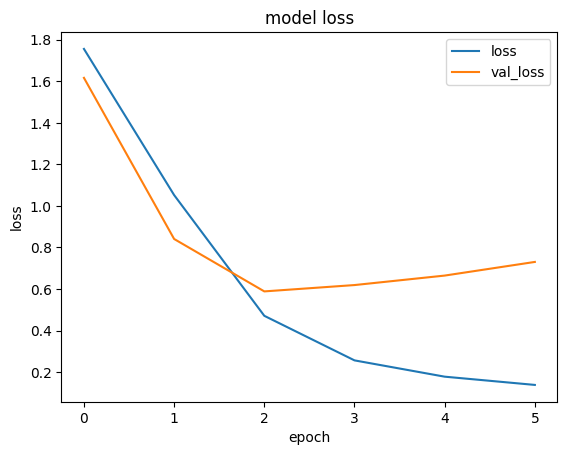

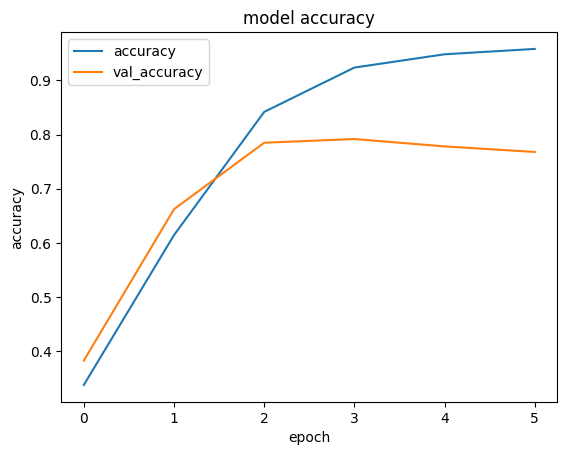

In [50]:
print(history.history.keys())
loss = history.history['loss']
val_loss = history.history['val_loss']
plt.plot(loss)
plt.plot(val_loss)
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['loss', 'val_loss'])
plt.show()

accuracy = history.history['accuracy']
val_accuracy= history.history['val_accuracy']
plt.plot(accuracy)
plt.plot(val_accuracy)
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['accuracy', 'val_accuracy'])
plt.show()
